In [32]:
import gzip
import json
import glob
import random
import tensorflow as tf
import os
import seaborn as sns
from matplotlib import pyplot as plt
from reddit.utils import load_tfrecord

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

## Check subreddit overlap between anchor and examples

In [2]:
fs = glob.glob('../reddit/data/json/triplet/1pos_1neg_random/*')

In [3]:
user_count = 0
trues = 0
neg_trues = 0
for idx, f in enumerate(fs):
    print(f'{idx} of {len(fs)}')
    lst = json.load(gzip.open(f))
    user_count += len(lst)
    for l in lst:
        overlap = all([ps in l['anchor_subreddits'] 
                       for ps in l['positive_subreddits']])
        neg_overlap = all([ns in l['anchor_subreddits'] 
                           for ns in l['negative_subreddits']])
                    
        if overlap is True:
            trues += 1
        if neg_overlap is True:
            neg_trues += 1



0 of 171
1 of 171
2 of 171
3 of 171
4 of 171
5 of 171
6 of 171
7 of 171
8 of 171
9 of 171
10 of 171
11 of 171
12 of 171
13 of 171
14 of 171
15 of 171
16 of 171
17 of 171
18 of 171
19 of 171
20 of 171
21 of 171
22 of 171
23 of 171
24 of 171
25 of 171
26 of 171
27 of 171
28 of 171
29 of 171
30 of 171
31 of 171
32 of 171
33 of 171
34 of 171
35 of 171
36 of 171
37 of 171
38 of 171
39 of 171
40 of 171
41 of 171
42 of 171
43 of 171
44 of 171
45 of 171
46 of 171
47 of 171
48 of 171
49 of 171
50 of 171
51 of 171
52 of 171
53 of 171
54 of 171
55 of 171
56 of 171
57 of 171
58 of 171
59 of 171
60 of 171
61 of 171
62 of 171
63 of 171
64 of 171
65 of 171
66 of 171
67 of 171
68 of 171
69 of 171
70 of 171
71 of 171
72 of 171
73 of 171
74 of 171
75 of 171
76 of 171
77 of 171
78 of 171
79 of 171
80 of 171
81 of 171
82 of 171
83 of 171
84 of 171
85 of 171
86 of 171
87 of 171
88 of 171
89 of 171
90 of 171
91 of 171
92 of 171
93 of 171
94 of 171
95 of 171
96 of 171
97 of 171
98 of 171
99 of 171
100 of 171

In [4]:
print('Positive subreddit in anchor')
print(trues/user_count)
print('Negative subreddit in anchor')
print(neg_trues/user_count)

Positive subreddit in anchor
0.47425253498320746
Negative subreddit in anchor
0.006584075357005865


## Human baseline

In [20]:
lst = json.load(gzip.open(random.sample(fs, 1)[0]))
samples = random.sample(lst, 1)
reverse = random.sample(range(len(lst)), int(len(lst)/2))
for idx, s in enumerate(samples):
    print('***** Anchor ****\n')
    for a in s['anchor']:
        print(a[:500])
    print(s['anchor'])
    print('\n***** Example 1 *****\n')
    if idx in reverse:
        print(s['negative'][0][:500])
        print('\n***** Example 2 *****\n')
        print(s['positive'][0][:500])
    else:
        print(s['positive'][0][:500])
        print('\n***** Example 2 *****\n')
        print(s['negative'][0][:500])
    print('*****\n')


***** Anchor ****

From 2018-2019 the US cost of living adjustment for SOCIAL SECURITY was 2.8%. The standard for working individuals should be higher. All 3% means is I can continue buying the same bread as I did last year and not have to switch to Great Value brand
I'm 27 now, live in a RITA state. I the last 8 years was plagued with untreated mental illness, alcohol addiction, and living in homeless shelters or the rare friendly couch. During this period I held around 20 different jobs for no longer than 6 months each. Presently, I've been clean and sober for 3 years, repaired most frayed relationships, have held my current job for a year and a half, am mentally stable(enough) from therapy and medications, and renting to own a house with a beautiful woman
Title says it all. I work a technician job in a hospital. A senior tech position recently opened up but was just given to one of my coworkers without any formal process and without posting the position for the rest of us techs to a

### Look into sentence length

In [2]:
from reddit.utils import load_tfrecord

In [5]:
ds = load_tfrecord(glob.glob('../reddit/data/datasets/triplet/1pos_1neg_random/*'))

In [47]:
zeros = []
for idx, e in enumerate(ds):
    if (idx + 1) % 100000 == 0:
        print(idx + 1)
    zeros += tf.math.count_nonzero(e['iids'], axis=1).numpy().tolist()

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000


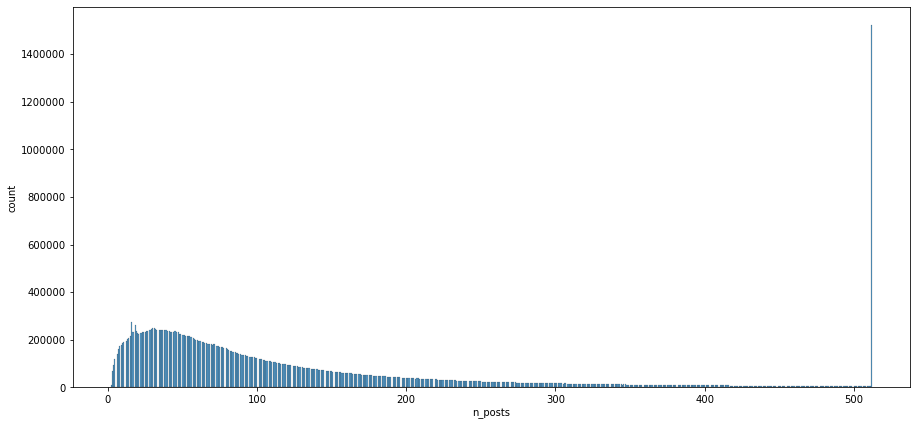

In [48]:
plt.figure(figsize=(15,7))
sns.histplot(zeros)
plt.xlabel('n_posts')
plt.ylabel('count')
plt.show()